# Chaines de Markov

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)
plt.style.use("default")
from IPython.display import Image

## Définition et exemples

### Définition intuitive

***NB:*** L'expression "chaine de Markov" (tout court) est pour nous synonyme de "chaine de Markov homogène en temps".

On se donne un ensemble dénombrable $E$: l'ensemble des "états". Par exemple   $E=\{0,1,2,3,4,5\}$.      On considère que les éléments de $E$ sont des sommets d'un graphe, dont les flèches sont pondérées.  



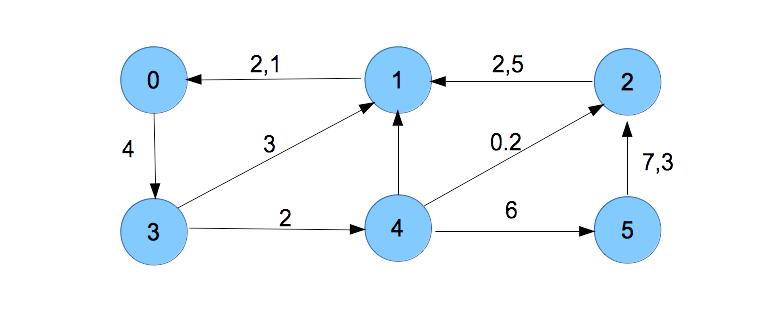


Une chaine de Markov $t\to X_t$  est un processus aléatoire qui se balade sur ce graphe. Au temps $t=0$ elle se trouve en un sommet $X_0$ donné.  Si au temps $t$ elle se trouve en $X_t$, elle choisit une des flèches partant de $X_t$,  avec une probabilité proportionnelle aux pondérations, et elle suit cette flèche pour arriver en un nouvel état $X_{t+1}$

Détaillons cela. Notons $w_{x,y}$ le poids allant de l'état $x$ à l'état $y$, puis:
$$
P(x,y) = \frac{w_{x,y}}{\sum_u w_{x,u}}
$$
Ainsi on a renormalisé les poids, et la chaine de Markov vérifie
$$
\mathbf P[X_{t+1}=y/X_t = x]=P(x,y)
$$
Naturellement, quand il n'y a pas de flèche entre $x$ et $y$, on a $P(x,y)=0$.  La matrice $\big ( P(x,y) \big)_{x,y \in E}$ est appelée matrice de transition.


***Remarque:*** Ici, les étiquettes que l'on a mises sur les états n'ont aucune importance. On aurait pu tout aussi bien prendre $E=\{A,B,C,E,D,F\}$. Mais dans certains exemples que l'on verra plus loin, le fait que les états soient des entiers a son importance.   

In [ ]:
"renvoie la matrice de transition associée au dessin précédent."
def premiere_chaine():
    P=np.zeros([6,6])
    P[0,3]=4
    P[1,0]=2.1
    P[2,1]=2.5
    P[3,1]=3
    P[3,4]=2
    P[4,1]=2
    P[4,2]=0.2
    P[4,5]=6
    P[5,2]=7.3
    sumLine=np.sum(P,axis=1)
    """ normalisons """
    P/=sumLine[:,np.newaxis]
    # ou bien  P/=np.expand_dims(sumLine,axis=1)
    # ou bien  P/=sumLine.reshape([-1,1])
    # ou bien for i in range(len(P)): P[i,:]/=sumLine[i]
    return P

print(premiere_chaine())



***Remarque:*** Dans le programme précédent j'ai proposé plusieurs manières pour renormaliser `P`. Choisissez celle que vous préférez, sachant cependant que l'usage est d'éviter les boucles (et perso je suis un fan de `np.newaxis`).

***A vous:*** Dans le dessin précédent, il manque un poids sur une des flèches. Combien vaut-il $(1\heartsuit)$?

In [ ]:
"une fonction qui simule une chaine de Markov à partir de sa matrice de transition"
def markov_from_P(t_max,P,x0):
    X=np.zeros(t_max,dtype=int)
    X[0]=x0
    for t in range(t_max-1):
        X[t+1]=np.random.choice(a=range(len(P)),p=P[X[t],:])
    return X

t_max=150
P=premiere_chaine()
X=markov_from_P(t_max,P,3)
plt.figure(figsize=(10,3))
plt.plot(range(t_max),X,".-");
plt.grid()

#### ♡

***A vous:*** A l'œil, quels sont les états les plus visités $(1\heartsuit)$? Est-ce qu'on aurait pu le déduire en observant le graphe?



On observe que les états 0,1 et 3 sont les plus visités. Ce n'est pas complètement évident à deviner à partir du graphe, mais on peut tout de même observer deux choses :
* L'état 1 est celui qui a le plus de flèches qui pointent sur lui, avec une masse totale relativement élevée.
* Les états 0 et 3 sont systématiquement visités après l'état 1

### Des marches aléatoires

Les marches aléatoires sont des chaines de Markov qui possèdent en plus une certaine homogénéité en espace.  Donnons des exemples:


* La marche aléatoire simple sur $E=\mathbb Z$: elle monte de 1 ou descend de 1 avec proba $\frac 12$.   

* Les marches aléatoires non-simples: elles montent et descendent selon une loi donnée. Par exemple, les sauts possibles sont {+1,+2,-1} avec proba {1/3,1/3,1/3}.


* La marche aléatoire simple absorbée sur $E=\{0,1,...,n-1\}$. Elle monte ou descend avec proba $\frac 12$. Une fois arrivée en $0$ ou en $n-1$, elle reste dans cet état.

*  La marche aléatoire simple réfléchie sur $E=\{0,1,...,n-1\}$. Elle monte ou descend avec proba $\frac 12$. Une fois arrivée en $0$ elle monte en 1,  une fois arrivée en $n-1$ elle descend en $n-2$.  



***Généralisation:*** On peut aussi imaginer des marches aléatoires sur $\mathbb R$ (par exemple avec des sauts gaussiens). Mais cela sort du cadre classique.



Simulons ces marches aléatoires. Pour les marches sur $E=\{0,1,...,n-1\}$, on commence par définir la matrice de transition.  Pour les marches sur $\mathbb Z$, on utilise une "mécanique de transition".  



* La marche aléatoire simple sur $E=\mathbb Z$ : chaque pas $S_i$ est une variable aléatoire qui vaut $-1$ avec probabilité $\frac{1}{2}$ et $+1$ avec probabilité $\frac{1}{2}$. En partant d'un point $X_0$, la position après $t$ pas est alors
$$X_t = X_0 + \sum_{i=1}^t S_i$$



#### ♡♡

In [ ]:
def marche_simple(t_max, x0=0):

for i in range(5):
    plt.plot(marche_simple(100), '.-')

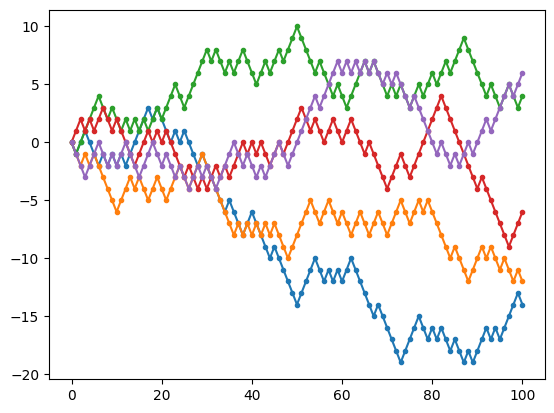

In [ ]:
#--- To keep following outputs, do not run this cell! ---

* Les marches aléatoires non-simples : par exemple, les sauts $S_i$ possibles sont $\{+1,+2,-1\}$ avec probabilité $\{1/3,1/3,1/3\}$. On utilise la même technique d'avant:





In [ ]:
def marche_non_simple(t_max, x0=0):

for i in range(5):
    plt.plot(marche_non_simple(100), '.-')

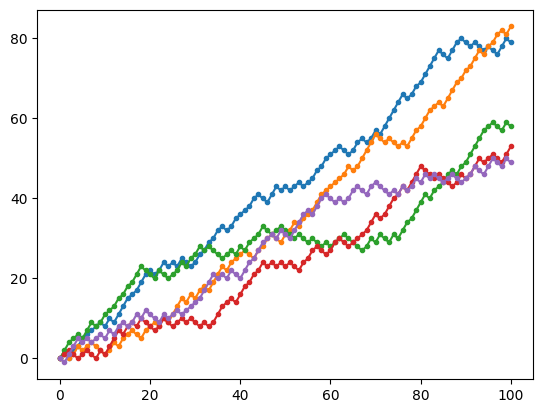

In [ ]:
#--- To keep following outputs, do not run this cell! ---

#### ♡♡


Cette marche aléatoire se dirige presque-surement vers $+\infty$. Démontrez-le en utilisant la loi des grands nombres.



* La marche aléatoire simple absorbée sur $E=\{0,1,...,n-1\}$ : sa matrice de passage est donnée par
$$
\begin{pmatrix}
1 & 0 & &  & &  \\
\frac{1}{2} & 0 & \frac{1}{2}\\
\\
&&\ddots&\ddots&\ddots\\
\\
&&&&\frac{1}{2} & 0 & \frac{1}{2} \\
 & &  & &  & 0 & 1 \\
\end{pmatrix},
$$
où les coefficients non renseignés sont des zéros.

#### ♡♡

In [ ]:
def marche_simple_absorbee(n, t_max, x0):



In [ ]:
for i in range(5):
    plt.plot(marche_simple_absorbee(10, 100,5), '.-')

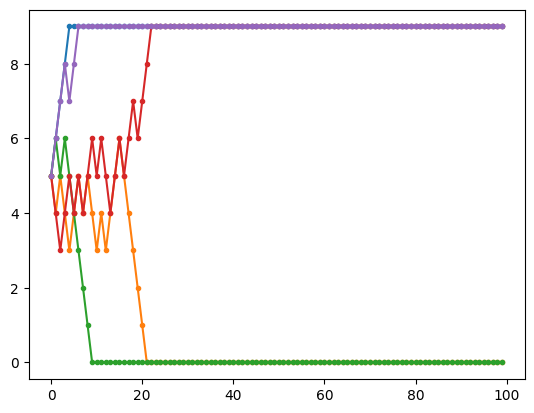

In [ ]:
#--- To keep following outputs, do not run this cell! ---

*  La marche aléatoire simple réfléchie sur $E=\{0,1,...,n-1\}$ : sa matrice de passage est donnée par
$$
\begin{pmatrix}
0 & 1 & &  & &  \\
\frac{1}{2} & 0 & \frac{1}{2}\\
\\
&&\ddots&\ddots&\ddots\\
\\
&&&&\frac{1}{2} & 0 & \frac{1}{2} \\
 & &  & &  & 1 & 0 \\
\end{pmatrix},
$$
où les coefficients non renseignés sont des zéros.

#### ♡♡

In [ ]:
def marche_simple_reflechie(n, t_max, x0):



In [ ]:
for i in range(5):
    plt.plot(marche_simple_reflechie(10, 100,5), '.-')

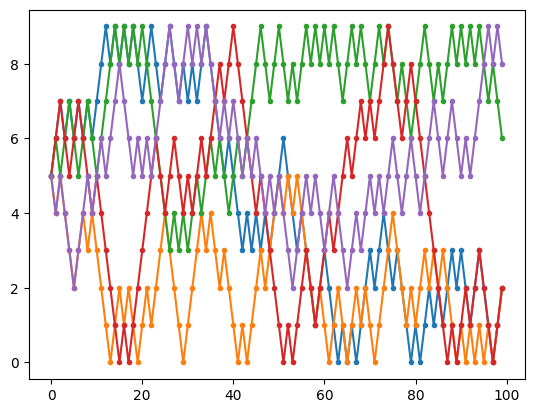

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### Définition formelle d'une chaine de Markov

Nous redéfinissons les chaines de Markov, mais de manière plus mathématique.

***Définition:*** Une chaine de Markov générale sur $E$ est une fonction  aléatoire (=un processus) $t \to X_t$ qui prend en $t=0$ une valeur $X_0$ donnée (possiblement aléatoire) et qui ensuite est régie par l'équation:

$$
X_{t+1} = f_{t+1} (X_t, U_{t+1})   
$$
avec

* $f_{t+1}$ fonction à valeur dans $E$
* $U_{t+1}$ v.a indépendante de tous les tirages aléatoires précédents, à savoir $X_0, U_1,U_2,...,U_t$.

Si de plus, les $f_t$ ne dépendent pas du temps $t$, on parle d'une chaine de Markov homogène dans le temps. Pour le commun des mortels, le terme "chaine de Markov" sous-entend  "homogène dans le temps".



La matrice de transition est définie par
$$
P_{t+1}(x,y) = \mathbf P[X_{t+1} = y / X_t = x]
$$
et dans le cas homogène en temps: $\forall t: P_t(x,y)= P_1(x,y)$.


#### ♡♡


***A vous:*** Dans la définition intuitive du début, parlait-on de chaine de Markov homogène dans le temps ou inhomogène dans le temps? Justifiez brièvement.



### Propriété fondamentale


***Théorème:***  Soit $t\to X_t$ une chaine de Markov générale.  La loi  de $X_{t+1}$ est indépendante de $X_{0},...,X_{t-1}$ sachant $X_t$, c.à.d:


\begin{align*}
&\mathbf P[X_{t+1} = x_{t+1} \ / \ X_t = x_t ,  X_{t-1}=x_{t-1} ,..., X_{0}=x_0  ]\\
&= \mathbf P[X_{t+1} = x_{t+1}  \ / \ X_t = x_t   ]
\end{align*}


Si de plus elle est homogène dans le temps alors
$$
\mathbf P[X_{t+1} = y  \ / \ X_t = x   ] = \mathbf P[X_{1} = y  \ / \ X_0 = x   ]
$$


Ce théorème admet une réciproque: si un processus $(X_t)$ satisfait la première équation alors c'est une chaine de Markov générale. Si en plus elle satistait la seconde équation, c'est une chaine de Markov homogène en temps.


Attention: classiquement, on utilise la propriété d'indépendance conditionnelle pour définir une chaine de Markov. La définition que j'ai choisie est plus proche de la pratique: les chaines de Markov étant toujours construites à l'aide d'une équation $X_{t+1} = f_{t+1} (X_t, U_{t+1})$ plus ou moins cachée. Par exemple, dans le programme qui nous permettait de simuler notre première chaine on utilisait:
```
    X[t+1]=np.random.choice(a=range(6),p=P[X[t],:])
          = fonction(X[t], rand() )
```
où la fonction `rand()` symbolise l'appel du générateur aléatoire de notre ordinateur. Chaque appel donnant un réel aléatoire uniforme sur `[0,1]` indépendant de tous les tirages précédents.


### Ambiguité de la terminologie.


Dans notre définition précédente une chaine de Markov $(X_t)$ est un processus aléatoire dont la loi est paramétrée par une distribution initiale $\mu_0$ et par un noyau de transition $P$.

Cependant le mot "chaine de Markov" est aussi souvent utilisé pour l'ensemble des processus $(X^x_t,x\in E)$ où chaque $X^x_t$ est "la" chaine de Markov partant de $x$ et de transiton $P$. La précision du point de départ peut aussi être précisée à l'aide d'un conditionnement:
$$
\mathbf E[f(X^x_t)] = \mathbf E[f(X_t)/X_0=x]
$$


Comme la plupart des auteurs nous laissons le flou sur la terminologie. Le contexte permettant de comprendre de quoi on parle (c'est humain 😀).


## Mesures et fonctions

Dans la théorie des chaines de Markov

* les matrices lignes sont assimilées à des mesures sur $E$.
* les matrices colonnes sont assimilées à des fonctions sur $E$.



Par exemple si on considère une chaine de Markov $X$ de matrice de transition $P$ et de loi initiale $\mu_0$. On a envie de considérer $\mu_0$ comme un vecteur ligne pour pouvoir faire la multiplication:
$$
\mu_0 P (y) = \sum_x \mu_0(x)P(x,y)
= \sum_x  \mathbf P[X_0=x]\, \mathbf P[X_{1}=y/X_0=x] = \mathbf P[X_1 = y]
$$



Et de même si $\mu_t $ est la loi de $X_{t}$ alors $\mu_t P $ est la loi de $X_{t+1}$. Par récurence la loi de $X_t$ est donnée par $\mu_0 P^t$.

En particulier, avec $\mu_0 = \delta_x$ on voit que  
$$
P^t(x,y)= \mathbf P[X_t = y / X_0=x]
$$



Par contre, les vecteurs colonnes sont assimilable à des fonctions sur $E$.  Par exemple, considérons $f$ un vecteur colonne sur $E$. On peut calculer ceci:

\begin{align*}
(P^t f)(x) &= \sum_y P^t (x,y) f(y) = \mathbf E[f(X_t) /X_0 = x]
\end{align*}
ou encore
$$
\mu_0 P^t f = \mathbf E[f(X_t)]
$$






Certaines mesures et fonctions sont particulièrement intéressantes:

* les mesures invariantes vérifient $\pi P=\pi$.
* les fonction invariantes vérifient $P\gamma = \gamma$. La plus connue étant la fonction constante $1$.

Nous allons en reparler.

## Mesure invariante

### Définition d'une mesure invariante

On appelle mesure invariante un vecteur positif $\pi$ sur $E$ vérifiant $\pi P=\pi$, c.à.d
$$
\forall y\in E,\  \sum_x \pi(x) P(x,y) = \pi(y)
$$
Si de plus $\pi$ vérifie $\sum_{x\in E} \pi(x)=1$ alors on parle de probabilité invariante.

***Théorème:*** Il existe toujours une mesure invariante.

***Corrolaire:*** Quand $E$ est fini, il existe toujours une probabilité invariante: il suffit de renormaliser une mesure invariante $\pi$, en la divisant par sa masse totale $\sum_x \pi(x)$.


#### ♡♡♡


***A vous:*** Reconsidérons la marche aléatoire simple sur $\mathbb Z$. Donnez  une mesure invariante (essayez de résoudre le système avec un $\pi$ très très simple). Peut-on  la renormaliser pour en faire une proba invariante?  Qu'en est-il de la marche aléatoire non-simple sur $\mathbb Z$?


### Cas fini

Plaçons-nous dans le cas $E$ fini.  

#### ♡♡


***À vous:*** Trouvez l'argument d'algèbre linéaire qui permet d'établir  l'existence d'une mesure invariante. Aide: il y a un vecteur propre à droite très facile à trouver pour $P$...




In [ ]:
""" calculons l'unique probabilité invariante de notre première chaine de Markov"""
def proba_invariante(P):
    val_pr,vec_pr=np.linalg.eig(P.T)
    val_pr=np.real(val_pr)
    vec_pr=np.real(vec_pr)
    pi=vec_pr[:,0]
    pi/=np.sum(pi)
    return pi

P=premiere_chaine()
pi=proba_invariante(P)
plt.bar(range(6),pi);

#### ♡♡


Commentons:

*  On transpose-t-on la matrice dans `np.linalg.eig(P.T)` car <font color="red"> □ □ □ </font>
*  on a joute `np.real` 
*  on divise par `np.sum(pi)` pour <font color="red"> □ □ □ </font>


#### ♡♡♡♡

Le programme ci-dessus n'est pas robuste. L'algo de diagonalisation ne garenti par que la plus grande valeur propre (ici c'est 1) est mise en première position. Mofifiez ce programme pour le rendre robuste.

## Temps passé dans des états

### Le théorème ergodique

***NB:*** À partir de maintenant et jusqu'à nouvel ordre, nous supposons que l'espace d'état $E$ est fini. Dans une dernière partie, nous verrons les difficultés qui se rajoutent dans le cas infini. Notamment on introduira la dichotomie transient/récurrent.

On dit qu'un graphe est ***irréductible*** lorsque l'on peut toujours aller d'un état à l'autre en suivant les flèches. On dit qu'une chaine de Markov est irréductible quand son graphe l'est.


***Théorème:*** Lorsqu'une chaine de Markov finie est irréductible, il n'y a qu'une seule mesure invariante, à une constante multiplicative près. Donc il y a une unique probabilité invariante.

*Remarque:* Ce théorème, en termes d'algèbre linéaire, nous indique que l'espace propre associé à la valeur propre 1 est de dimension 1.

Notons maintenant $X^x_t$ la chaine de Markov qui part du point $x$. Notons:

$$
  \Gamma_{T}^x(y) =\frac 1 T  \sum_{t=0}^{T-1}  1_{\{X^x_t = y  \}}
$$
C'est le temps moyen passé dans l'état $y$ en partant de $x$.  


***Théorème (ergodique):*** Quand $T$ tend vers l'infini:

* $\Gamma_{T}^x$ converge vers une probabilité invariante.
* En particulier, quand la chaine est irréductible, $\Gamma_{T}^x$ converge vers l'unique probabilité invariante.


Souvent on appelle ce théorème: la loi forte des grands nombres pour les chaines de Markov.




### Lien avec la LFGN



Cherchons un cas particulier de chaine de Markov pour lequel le théorème ergodique se résumerait à la loi forte des grands nombres.

Considérons simplement $(X_t)$ une suite de v.a i.i.d. de loi $\nu$ la loi.  C'est bien une chaine de Markov: sa matrice de transition $P$ est la matrice dont toutes les lignes sont $\nu$. Et on constate que $\nu P = \nu$ donc $\nu$ est une probabilité invariante.

Le théorème ergodique nous indique alors que:
$$
\frac 1 T \sum_{t=0}^{T-1} 1_{X_t=y}  \to \nu(y)
$$
On peut alors se donner une fonction $f$ sur $E$ et sommer cette équation:
$$
\frac 1 T \sum_{t=0}^{T-1} \sum_y f(y) 1_{X_t=y}  \to \sum_y f(y)\nu(y)
$$
Ce qui donne
$$
\frac 1 T \sum_{t=0}^{T-1}  f(X_t)  \to \mathbf E[f(X_0)]
$$
ce qui est une forme (très légèrement généralisée) de la loi forte des grands nombres.

### Illustration numérique

Illustrons le théorème ergodique :

In [1]:
t_max=5000
P=premiere_chaine()
pi=proba_invariante(P)
X=markov_from_P(t_max,P,3)
ts=[ 50, 100, 200, 400]

Gamma=np.zeros((6,len(ts)+1))
Gamma[:,-1]=pi


for i in range(6):
    for j,t in enumerate(ts):
        Gamma[i,j]=np.mean(X[:t]==i)



In [ ]:
import pandas as pd
df=pd.DataFrame(data=Gamma,columns=ts+["∞"])
df

Notons que pour faire les à moyennes aux instants $T_1$, $T_2$, …, $T_{max}$, Il faut bien faire les moyennes sur une même simulation de la chaîne de Markov (réalisée de 0 à $T_{max}$), et non pas en simuler une de 0 à $T_1$, puis une autre de 0 à $T_2$, etc.
